<a href="https://colab.research.google.com/github/Tiff923/Music-Generation/blob/main/CDS_data_vis%2C_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data vis ideas: https://onlinelibrary.wiley.com/doi/full/10.1111/cgf.13905

Prettymidi Tutorial: https://github.com/craffel/pretty-midi/blob/master/Tutorial.ipynb
Prettymidi Documentation: https://craffel.github.io/pretty-midi/
Prettymidi Overview: https://colinraffel.com/publications/ismir2014intuitive.pdf

Music AI Tutorial: https://davidkantportfolio.com/music-ai-tutorial/

https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_MIDI.html
https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_CSV.html

In [ ]:
# install external libraries for sound playback
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
!apt-get install lame
!git clone https://github.com/davidkant/mai.git
clear_output()

In [ ]:
# imports
import mai
import random
import pretty_midi
import matplotlib.pyplot as plt
import copy
import IPython.display

In [ ]:
!pip install mir_eval
import mir_eval.display
import librosa.display
import numpy as np
clear_output()

In [ ]:
import seaborn as sns
import mido

In [ ]:
from google.colab import files
uploaded = files.upload()

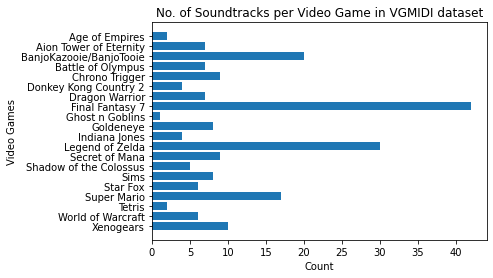

In [ ]:
#keys = list(uploaded.keys())
#songs = [x.replace('_',' ') for x in keys]

game = ['Age of Empires', 'Aion Tower of Eternity', 'BanjoKazooie/BanjoTooie', 'Battle of Olympus', 'Chrono Trigger', 'Donkey Kong Country 2', 'Dragon Warrior', 'Final Fantasy 7', 'Ghost n Goblins', 'Goldeneye', 'Indiana Jones', 'Legend of Zelda', 'Secret of Mana', 'Shadow of the Colossus', 'Sims', 'Star Fox', 'Super Mario', 'Tetris', 'World of Warcraft', 'Xenogears']
count = [2,7,20,7,9,4,7,42,1,8,4,30,9,5,8,6,17,2,6,10]

index = np.arange(len(game))

fig, ax = plt.subplots()
barchart = ax.barh(index, count, height=0.8)

ax.set_title('No. of Soundtracks per Video Game in VGMIDI dataset')
ax.set_ylabel('Video Games')
ax.set_xlabel('Count')
ax.set_yticks(index)
ax.set_yticklabels(game)
ax.invert_yaxis()

In [ ]:
midi_data = pretty_midi.PrettyMIDI('BanjoKazooie_BoggysIglooHappy.mid')
print(midi_data.instruments)
instrument_index = 0
instrument = midi_data.instruments[instrument_index]
print(instrument.notes) #Note: start, end, pitch, velocity

[Instrument(program=0, is_drum=False, name="Right Hand"), Instrument(program=0, is_drum=False, name="Left Hand")]
[Note(start=0.004126, end=0.434501, pitch=66, velocity=69), Note(start=0.434914, end=0.745213, pitch=70, velocity=65), Note(start=0.745626, end=0.847133, pitch=73, velocity=64), Note(start=0.853735, end=1.272144, pitch=75, velocity=67), Note(start=1.267605, end=1.346005, pitch=73, velocity=65), Note(start=1.337752, end=1.416152, pitch=75, velocity=64), Note(start=1.407900, end=1.486300, pitch=73, velocity=64), Note(start=1.478047, end=1.556447, pitch=75, velocity=64), Note(start=1.548195, end=1.626595, pitch=73, velocity=64), Note(start=1.618342, end=1.698393, pitch=75, velocity=64), Note(start=1.691791, end=1.757399, pitch=73, velocity=69), Note(start=1.760700, end=1.809391, pitch=75, velocity=64), Note(start=1.812692, end=1.860970, pitch=73, velocity=64), Note(start=1.864271, end=1.912136, pitch=75, velocity=64), Note(start=1.915437, end=2.112262, pitch=66, velocity=64), 

In [ ]:
import pandas as pd

def midi_to_list(midi_data):
    midi_list = []
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            end = note.end
            pitch = note.pitch
            velocity = note.velocity
            midi_list.append([start, end-start, pitch, velocity/128., instrument.name]) #velocity is to control volume of instrument, to make it more human, range from 0-127
    return midi_list
        
midi_list = midi_to_list(midi_data)

#midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Piano'])
print(df)

duration = []
for instrument_index in range(len(midi_data.instruments)):
  instrument = midi_data.instruments[instrument_index]
  instrument_dur = [(n2.start - n1.start) for n1,n2 in zip(instrument.notes[:-1], instrument.notes[1:])]
  duration += instrument_dur
  duration.append(0)

df['Duration'] = pd.Series(duration)
df

         Start       End  Pitch  Velocity       Piano
0     0.004126  0.430375     66  0.539062  Right Hand
1     0.434914  0.310299     70  0.507812  Right Hand
2     0.745626  0.101507     73  0.500000  Right Hand
3     0.853735  0.418409     75  0.523438  Right Hand
4     1.267605  0.078400     73  0.507812  Right Hand
..         ...       ...    ...       ...         ...
239  26.624657  0.195587     35  0.492188   Left Hand
240  27.043891  0.210855     42  0.539062   Left Hand
241  27.477154  0.195587     37  0.500000   Left Hand
242  27.895975  0.197651     42  0.523438   Left Hand
243  28.314797  0.195587     37  0.500000   Left Hand

[244 rows x 5 columns]


Start       End  Pitch  Velocity       Piano  Duration
0     0.004126  0.430375     66  0.539062  Right Hand  0.430788
1     0.434914  0.310299     70  0.507812  Right Hand  0.310712
2     0.745626  0.101507     73  0.500000  Right Hand  0.108110
3     0.853735  0.418409     75  0.523438  Right Hand  0.413870
4     1.267605  0.078400     73  0.507812  Right Hand  0.070147
..         ...       ...    ...       ...         ...       ...
239  26.624657  0.195587     35  0.492188   Left Hand  0.419234
240  27.043891  0.210855     42  0.539062   Left Hand  0.433263
241  27.477154  0.195587     37  0.500000   Left Hand  0.418821
242  27.895975  0.197651     42  0.523438   Left Hand  0.418821
243  28.314797  0.195587     37  0.500000   Left Hand  0.000000

[244 rows x 6 columns]

In [ ]:
len(df['Pitch'].unique())

28

In [ ]:
a1 = midi_data.get_pitch_class_transition_matrix(False)
a1

array([[ 9.,  3.,  3.,  0.,  2.,  4.,  0., 16.,  0.,  3.,  0.,  6.],
       [ 3.,  3.,  4., 15.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 4.,  4.,  0.,  0.,  4.,  0.,  1.,  2.,  0.,  1.,  0.,  2.],
       [ 0., 13.,  0.,  4.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  6.,  0.,  0.,  4.,  0.,  0.,  0.,  2.,  0.,  3.],
       [ 3.,  1.,  0.,  0.,  3.,  0.,  3.,  7.,  0.,  0.,  0.,  2.],
       [ 0.,  1.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  4.,  0.],
       [13.,  0.,  4.,  0.,  2.,  7.,  2., 10.,  0., 11.,  0.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  2.,  0.,  0., 13.,  0.,  0.,  2.,  7.],
       [ 0.,  4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  2.],
       [ 7.,  0.,  1.,  0.,  2.,  3.,  0.,  4.,  0.,  7.,  2.,  3.]])

In [ ]:
test = pretty_midi.PrettyMIDI('Aion_Tower_of_Eternity_FairyofthePeace.mid')
a2 = test.get_pitch_class_transition_matrix(False)
print(a2)
Q =  a2/sum(sum(a2))
print(Q)

[[ 13.   0.  19.   3.  17.  10.   1.  24.   0.  23.   0.  29.]
 [  4.   9.  12.   7.  23.   0.  20.  11.   0.  20.   5.  25.]
 [ 18.  24.  29.   0.  64.   1.  14.  95.   0.  53.   1.  35.]
 [  1.   0.   0.   8.   8.   6.   5.   3.   1.   4.   4.   3.]
 [ 20.   5.  77.   5.  63.  12.  38.  62.   0.  54.   3.  64.]
 [ 15.   0.  10.   0.   7.   4.   1.   8.   0.   5.   0.  13.]
 [  4.  22.  15.  11.  54.   2.  11.  34.   6.  21.   3.  16.]
 [ 19.  27.  36.   0.  54.  11.  32.  33.   0. 116.   5.  27.]
 [  0.   0.   0.   5.   0.   0.   0.   0.   0.   0.   4.   0.]
 [ 18.  21.  96.   5.  90.  12.  20.  69.   0.  49.   6.  71.]
 [  0.   6.   2.   3.   0.   0.   2.   0.   2.   7.   0.   3.]
 [ 14.  14.  41.   2.  57.   4.  36.  44.   0.  52.   6.  24.]]
[[0.00528026 0.         0.0077173  0.00121852 0.00690496 0.00406174
  0.00040617 0.00974817 0.         0.009342   0.         0.01177904]
 [0.0016247  0.00365556 0.00487409 0.00284322 0.009342   0.
  0.00812348 0.00446791 0.         0.00812348 

In [ ]:
tran = pd.DataFrame(Q, index = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
tran.columns = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
tran

C        C#         D  ...         A        A#         B
C   0.005280  0.000000  0.007717  ...  0.009342  0.000000  0.011779
C#  0.001625  0.003656  0.004874  ...  0.008123  0.002031  0.010154
D   0.007311  0.009748  0.011779  ...  0.021527  0.000406  0.014216
D#  0.000406  0.000000  0.000000  ...  0.001625  0.001625  0.001219
E   0.008123  0.002031  0.031275  ...  0.021933  0.001219  0.025995
F   0.006093  0.000000  0.004062  ...  0.002031  0.000000  0.005280
F#  0.001625  0.008936  0.006093  ...  0.008530  0.001219  0.006499
G   0.007717  0.010967  0.014622  ...  0.047116  0.002031  0.010967
G#  0.000000  0.000000  0.000000  ...  0.000000  0.001625  0.000000
A   0.007311  0.008530  0.038993  ...  0.019903  0.002437  0.028838
A#  0.000000  0.002437  0.000812  ...  0.002843  0.000000  0.001219
B   0.005686  0.005686  0.016653  ...  0.021121  0.002437  0.009748

[12 rows x 12 columns]

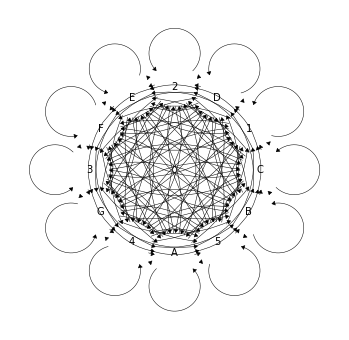

In [ ]:
from hmmviz import TransGraph

graph = TransGraph(tran)

# looks best on square figures/axes
fig = plt.figure(figsize=(6, 6))

graph.draw(edgewidths=0.5)

plt.show()

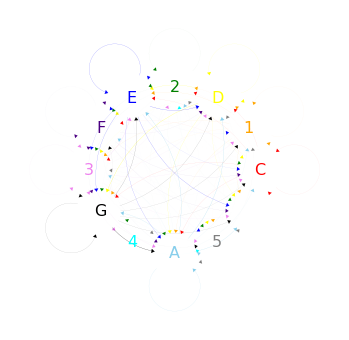

In [ ]:
graph = TransGraph(tran)

fig = plt.figure(figsize=(6, 6))

colors = {'C': 'red', '1':'orange', 'D':'yellow', '2':'green', 'E':'blue', 'F':'indigo', '3':'violet', 'G':'black', '4':'aqua', 'A':'skyblue', '5':'grey', 'B':'white'}

graph.draw(
    nodecolors=colors, edgecolors=colors, edgelabels=False,
    nodefontsize=16,
)

plt.show()

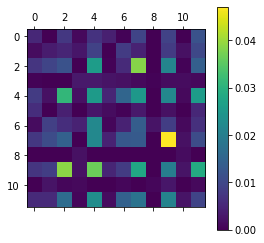

In [ ]:
plt.matshow(Q)
plt.colorbar()
plt.show()

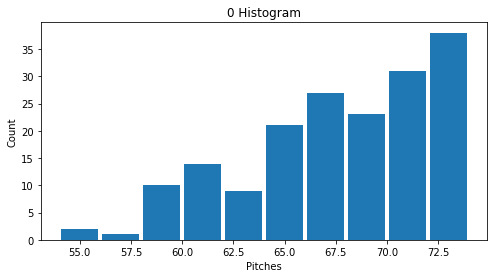

In [ ]:
instrument_index = 0
instrument = midi_data.instruments[instrument_index]
pitches_0 = [note.pitch for note in instrument.notes] 

plt.figure(figsize=(8,4)) 
plt.hist(pitches_0, align='left', rwidth=0.9)
plt.title("0 Histogram")
plt.xlabel('Pitches')
plt.ylabel('Count')
plt.show()

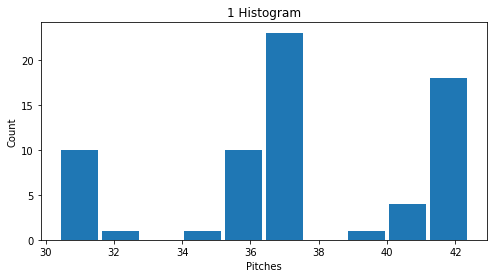

In [ ]:
instrument_index = 1
instrument = midi_data.instruments[instrument_index]
pitches_1 = [note.pitch for note in instrument.notes] 

plt.figure(figsize=(8,4)) 
plt.hist(pitches_1, align='left', rwidth=0.9)
plt.title("1 Histogram")
plt.xlabel('Pitches')
plt.ylabel('Count')
plt.show()

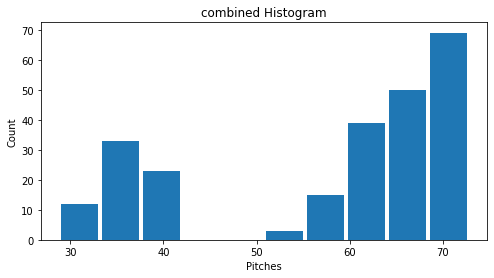

In [ ]:
combined = pitches_0 + pitches_1
plt.figure(figsize=(8,4)) 
plt.hist(combined, align='left', rwidth=0.9)
plt.title("combined Histogram")
plt.xlabel('Pitches')
plt.ylabel('Count')
plt.show()

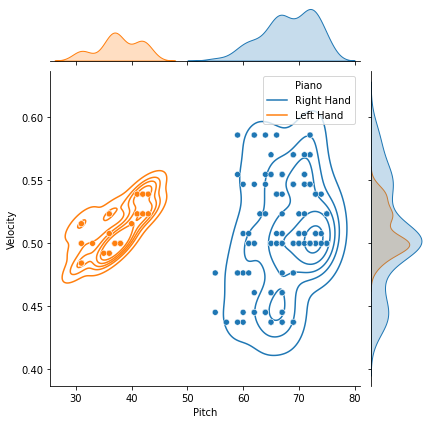

In [ ]:
g = sns.jointplot(x = "Pitch", y = "Velocity", hue="Piano", kind = "scatter", data = df) 
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

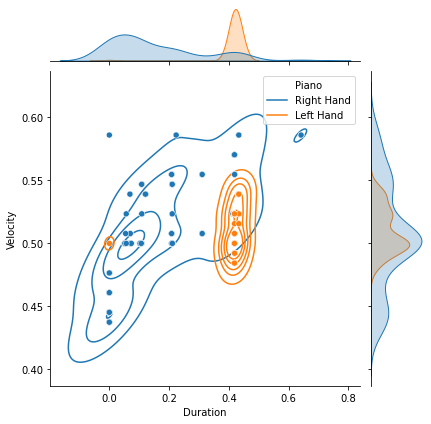

In [ ]:
h = sns.jointplot(x = "Duration", y = "Velocity", hue="Piano", kind = "scatter", data = df) 
h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plt.show() 

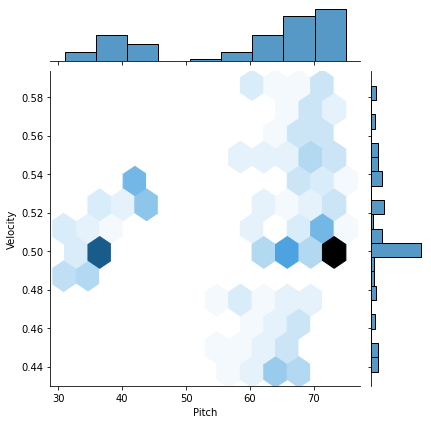

In [ ]:
# draw jointplot with hex kind 
sns.jointplot(x = "Pitch", y = "Velocity", 
              kind = "hex", data = df) 
# show the plot 
plt.show() 


[[ 9.  3.  3.  0.  2.  4.  0. 16.  0.  3.  0.  6.]
 [ 3.  3.  4. 15.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 4.  4.  0.  0.  4.  0.  1.  2.  0.  1.  0.  2.]
 [ 0. 13.  0.  4.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  4.  0.  0.  0.  2.  0.  3.]
 [ 3.  1.  0.  0.  3.  0.  3.  7.  0.  0.  0.  2.]
 [ 0.  1.  0.  0.  0.  2.  0.  2.  0.  0.  4.  0.]
 [13.  0.  4.  0.  2.  7.  2. 10.  0. 11.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  2.  0.  0. 13.  0.  0.  2.  7.]
 [ 0.  4.  0.  0.  0.  0.  1.  0.  0.  2.  0.  2.]
 [ 7.  0.  1.  0.  2.  3.  0.  4.  0.  7.  2.  3.]]


Text(0, 0.5, 'Proportion')

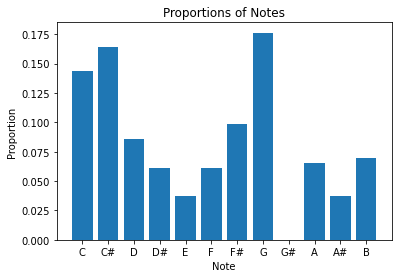

In [ ]:
print(midi_data.get_pitch_class_transition_matrix(False))

# Plot a pitch class distribution - sort of a proxy for key
plt.bar(np.arange(12), midi_data.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.title('Proportions of Notes')
plt.xlabel('Note')
plt.ylabel('Proportion')

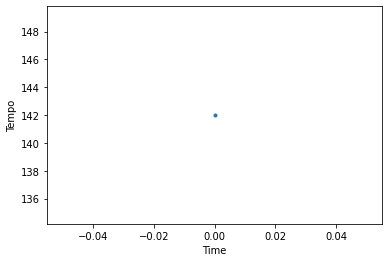

In [ ]:
# Plot the tempo changes over time
# Many MIDI files won't have more than one tempo change event,
# but this particular file was transcribed to somewhat closely match the original song.
times, tempo_changes = midi_data.get_tempo_changes()
plt.plot(times, tempo_changes, '.')
plt.xlabel('Time')
plt.ylabel('Tempo');

In [ ]:
print(midi_data.get_piano_roll(100))
print(len(midi_data.get_piano_roll(100)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
128


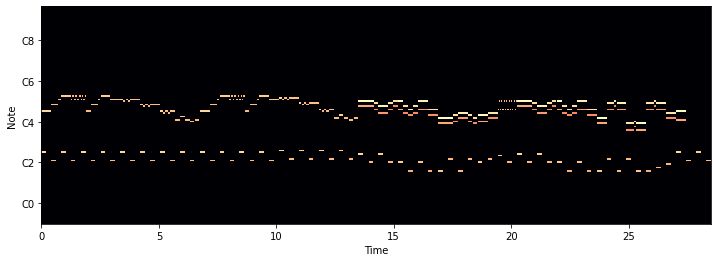

In [ ]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

import librosa.display
plt.figure(figsize=(12, 4))
plot_piano_roll(midi_data, 0, 1000)

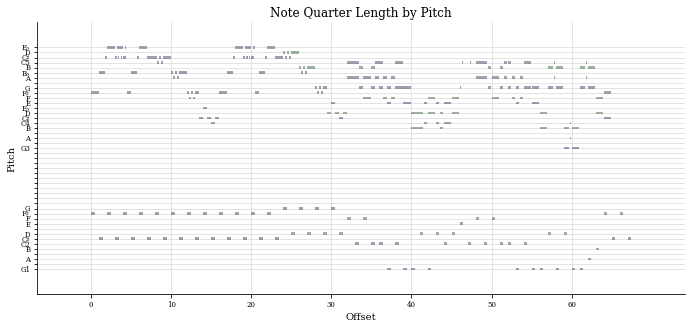

In [ ]:
import music21 as m21

s = m21.converter.parse('BanjoKazooie_BoggysIglooHappy.mid')
s.plot('pianoroll', figureSize=(12, 5))

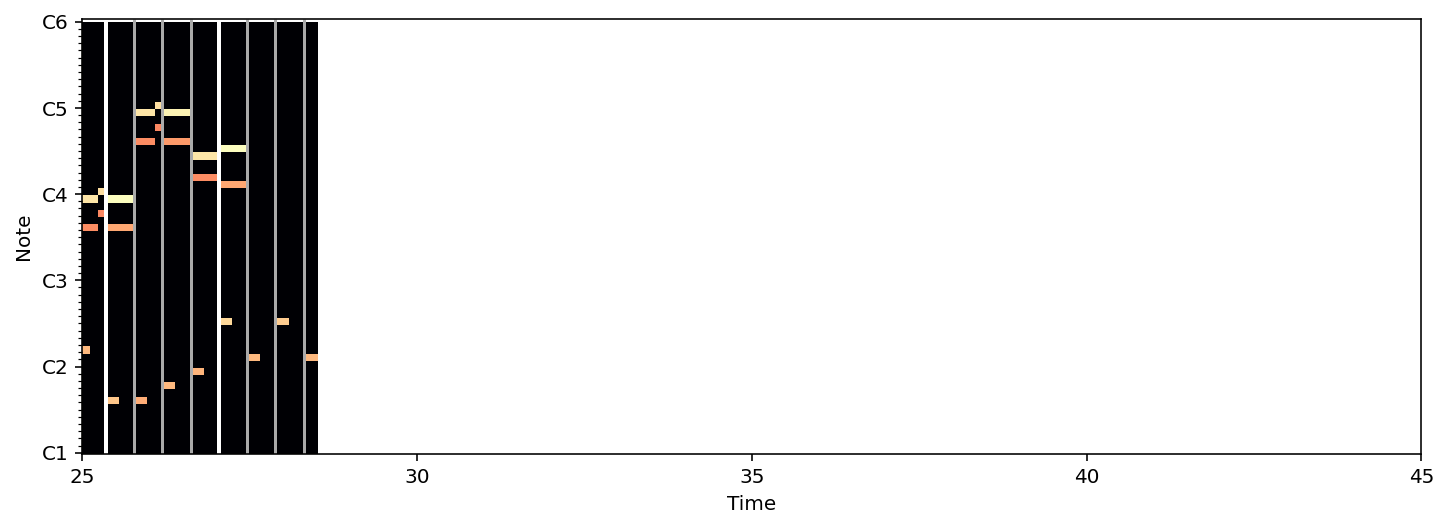

In [ ]:
import mir_eval.display

# Get and downbeat times
beats = midi_data.get_beats()
downbeats = midi_data.get_downbeats()
# Plot piano roll
plt.figure(figsize=(12, 4))
plot_piano_roll(midi_data, 24, 84)
ymin, ymax = plt.ylim()
# Plot beats as grey lines, downbeats as white lines
mir_eval.display.events(beats, base=ymin, height=ymax, color='#AAAAAA')
mir_eval.display.events(downbeats, base=ymin, height=ymax, color='#FFFFFF', lw=2)
# Only display 20 seconds for clarity
plt.xlim(25, 45);

In [ ]:
print('Program number 0 is {}'.format(pretty_midi.program_to_instrument_name(0)))
print('... and has instrument class {}'.format(pretty_midi.program_to_instrument_class(0)))
print('Acoustic Grand Piano has program number {}'.format(pretty_midi.instrument_name_to_program('Acoustic Grand Piano')))

print('A pitch bend value of 1000 is {:.3f} semitones'.format(pretty_midi.pitch_bend_to_semitones(1000)))
print('To pitch bend by -1.3 semitones, use the value {}'.format(pretty_midi.semitones_to_pitch_bend(-1.3)))

Program number 0 is Acoustic Grand Piano
... and has instrument class Piano
Acoustic Grand Piano has program number 0
A pitch bend value of 1000 is 0.244 semitones
To pitch bend by -1.3 semitones, use the value -5324


In [ ]:
keys = list(uploaded.keys())
allpitches = []
allvelocities = []
alldurations = []
allinstruments = []

for i in keys:
  midi_data = pretty_midi.PrettyMIDI(i)
  allinstruments.append(midi_data.instruments)

  instrument_index = 0
  instrument = midi_data.instruments[instrument_index]

  original_pitches = [note.pitch for note in instrument.notes]
  allpitches += original_pitches

  original_velocites = [note.velocity for note in instrument.notes]
  allvelocities += original_velocites

  original_durations = [(n2.start - n1.start) for n1,n2 in zip(instrument.notes[:-1], instrument.notes[1:])]
  alldurations += original_durations
  alldurations.append(0)

print(allpitches)
print(allvelocities)
print(alldurations)
print(allinstruments)
print(len(allinstruments))

/usr/local/lib/python3.6/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


[69, 81, 69, 81, 69, 81, 69, 81, 69, 81, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 64, 67, 76, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 67, 70, 79, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 64, 67, 76, 64, 67, 76, 65, 69, 77, 67, 64, 76, 60, 64, 72, 62, 65, 74, 79, 78, 79, 81, 82, 81, 79, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 78, 79, 79, 74, 74, 74, 77, 81, 82, 81, 79, 75, 74, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 78, 79, 64, 71, 76, 69, 72, 81, 72, 76, 84, 71, 74, 83, 69, 72, 81, 71, 74, 83, 64, 71, 76, 69, 72, 81, 72, 76, 84, 71, 74, 83, 69, 72, 81, 74, 77, 86, 64, 71, 76, 69, 72, 81, 72, 76, 84, 71, 74, 83, 69, 72, 81, 71, 74, 83, 71, 74, 83, 72, 76, 84, 74, 71, 83, 67, 71, 79, 69, 72, 81, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 62, 62, 62, 65, 57, 58, 62, 62, 62, 65, 57, 58, 62, 62, 62, 65, 57, 58, 62, 62, 62, 65, 57, 58, 58, 58, 58, 62, 55, 65, 58,

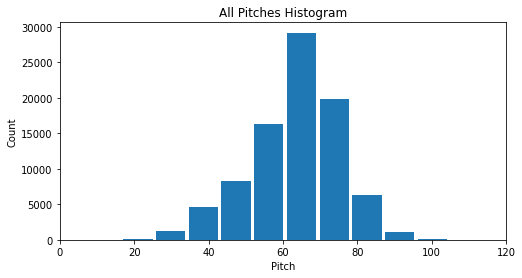

In [ ]:
plt.figure(figsize=(8,4)) 
plt.hist(allpitches, align='left', rwidth=0.9)
plt.title("All Pitches Histogram")
plt.xlim(0,120)
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.show()

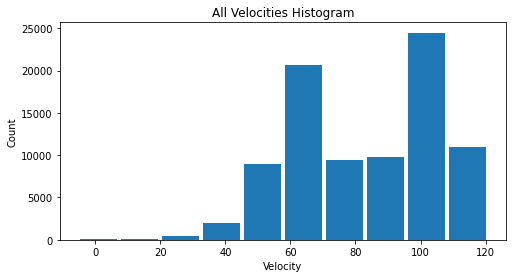

In [ ]:
plt.figure(figsize=(8,4)) 
plt.hist(allvelocities, align='left', rwidth=0.9)
plt.title("All Velocities Histogram")
plt.xlabel('Velocity')
plt.ylabel('Count')
plt.show()

In [ ]:
pitchcompile = np.zeros((12,12))

for i in keys:
  midi_data = pretty_midi.PrettyMIDI(i)
  pitchdata = midi_data.get_pitch_class_transition_matrix(False)
  pitchcompile = np.add(pitchcompile, pitchdata)

pitchcompilenorm = pitchcompile/sum(sum(pitchcompile))
pitchcompilenorm

/usr/local/lib/python3.6/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


array([[0.02020397, 0.00361685, 0.01033174, 0.00477306, 0.00872096,
        0.01095926, 0.0021543 , 0.01425988, 0.00329074, 0.00796004,
        0.00570692, 0.009304  ],
       [0.00418507, 0.00984752, 0.0048027 , 0.0029251 , 0.00382438,
        0.00301898, 0.00686312, 0.00242606, 0.00357238, 0.0040319 ,
        0.00282134, 0.00340933],
       [0.01084067, 0.00489658, 0.0252389 , 0.00402202, 0.01197217,
        0.00871602, 0.00647772, 0.01340508, 0.00190231, 0.01368178,
        0.00528693, 0.0078711 ],
       [0.00461988, 0.00288558, 0.00495094, 0.01065785, 0.00368108,
        0.00482741, 0.00251006, 0.00420484, 0.0042246 , 0.00121056,
        0.00391331, 0.00237665],
       [0.00856285, 0.00344886, 0.01090985, 0.00370579, 0.02594053,
        0.00703112, 0.00703112, 0.01308391, 0.00382932, 0.01195735,
        0.00196654, 0.01204629],
       [0.01038609, 0.00288558, 0.00755981, 0.00411096, 0.00745605,
        0.01838566, 0.00299428, 0.00942753, 0.00271264, 0.00764381,
        0.00612196,

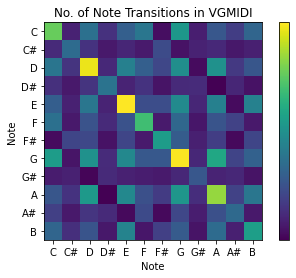

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(pitchcompilenorm)

labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_title("No. of Note Transitions in VGMIDI")
ax.set_ylabel('Note')
ax.set_xlabel('Note')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('', rotation=-90, va="bottom")
cbar.set_ticks([])

plt.show()

In [ ]:
import random
import functools
import numpy as np
import matplotlib.pyplot as plt

class Markov:
    """A very simple markov model"""

    def __init__(self):

        # initialize transition table
        self.transitions = dict()

        # initialize current state
        self.state = ()

    def train(self, data, order=3, init_state=True, compute_matrix=False):
        """Train the Markov model"""

        # loop through data
        for i in range(order, len(data)):

            # previous state   
            prev_state = tuple(data[i-order:i])

            # current state 
            curr_state = data[i]

            # key is a tuple: (prev, curr)
            key = (prev_state, curr_state)

            # if key in transitions
            if key in self.transitions:

                # increment count by 1
                self.transitions[key] += 1

            # if key not in transitions
            else:
                                                                                        
                # initialize count to 1
                self.transitions[key] = 1

        # set initial state
        if init_state:
            self.state = tuple(data[:order])

        # store transition table as matrix
        if compute_matrix:
            self.compute_transition_matrix()

    def choose(self, suppress_errors=False):
        """Choose next value"""

        # get all m-grams for the current state
        alpha = dict(filter(lambda kv: kv[0][0]==self.state, self.transitions.items()))

        # if no successor found
        if len(alpha) == 0: 
            
            # option 1: raise error
            if not suppress_errors: raise LookupError('Current state not found in transition table')
        
            # option 2: random state from the entire table
            else: alpha = self.transitions 

        # weighed choose
        choice = random.choice(functools.reduce(lambda x,y: x+y, [[k]*v for k,v in alpha.items()]))

        # update state
        self.state = tuple(list(self.state)[1:] + [choice[1]])
                                
        # return
        return choice[1]

    def choice(self, suppress_errors=False, k=None, include_initial=True):
        """Choose next value and allow for multiple choices at a time"""

        # store initial state
        initial_state = self.state

        # generate new sequence
        seq = self.choose(suppress_errors=suppress_errors) if k is None else \
            [self.choose(suppress_errors=suppress_errors) for i in range(k)]
        
        # prepend first order elements
        if include_initial:
            seq = list(initial_state) + seq

        return seq

    def clear(self):
        """Clear the transition table"""

        self.transitions.clear()

    def transition_matrix(self):
        """Transitions as a matrix"""

        return self.alpha

    def compute_transition_matrix(self):
        """Compute transitions as a matrix for internal use"""

        self.s1_states = sorted(set([x[0] for x in self.transitions.keys()]))
        self.s2_states = sorted(set([x[1] for x in self.transitions.keys()]))

        self.alpha = np.zeros((len(self.s1_states), len(self.s2_states)))

        for ((s1,s2), c) in self.transitions.items():
            s1_index = self.s1_states.index(s1)
            s2_index = self.s2_states.index(s2)
            self.alpha[s1_index, s2_index] = c

    def choose_np(self, suppress_errors=False):
        """Choose next value"""

        # if no successor found
        if self.state not in self.s1_states: 
            
            # option 1: raise error
            if not suppress_errors: raise LookupError('Current state not found in transition table')

            # option 2: random state from the entire table
            # not yet implemented

        # look up from state index
        s1_index = self.s1_states.index(self.state)

        # choose
        choice = random.choices(self.s2_states, weights=self.alpha[s1_index])[0]

        # update state
        self.state = tuple(list(self.state)[1:] + [choice])
                                
        # return
        return choice

    def choice_np(self, suppress_errors=False, k=None):
        """Choose next value and allow for multiple choices at a time"""

        return self.choose_np(suppress_errors=suppress_errors) if k is None else \
            [self.choose_np(suppress_errors=suppress_errors) for i in range(k)]

    def plot_transition_matrix(self, figsize=(3,3), figscale=0.5, cmap='viridis', show=True):
        """Plot transition matrix"""

        self.compute_transition_matrix()
        alpha = self.transition_matrix()
        num_rows, num_cols = alpha.shape
        figscale = figscale
        fig = plt.figure(figsize=(figscale*num_cols, figscale*num_rows))
        ax = plt.gca()
        im = ax.imshow(alpha, cmap=cmap, aspect='auto')
        #ax.grid(False)
        ax.set_title("No. of Pitch Transitions in VGMIDI")
        ax.set_ylabel('Pitch (midi note number)')
        ax.set_xlabel('Pitch (midi note number)')
        #cbar = ax.figure.colorbar(im, ax=ax)
        #cbar.ax.set_ylabel('', rotation=-90, va="bottom")
        #cbar.set_ticks([])

        if show: 
            plt.show()
        else:
            return fig

    def print_transitions(self):
        """Pretty print transition tabale"""
        for k,v in self.transitions.items():
            print("{0} -> {1} : {2}".format(k[0], k[1], v))

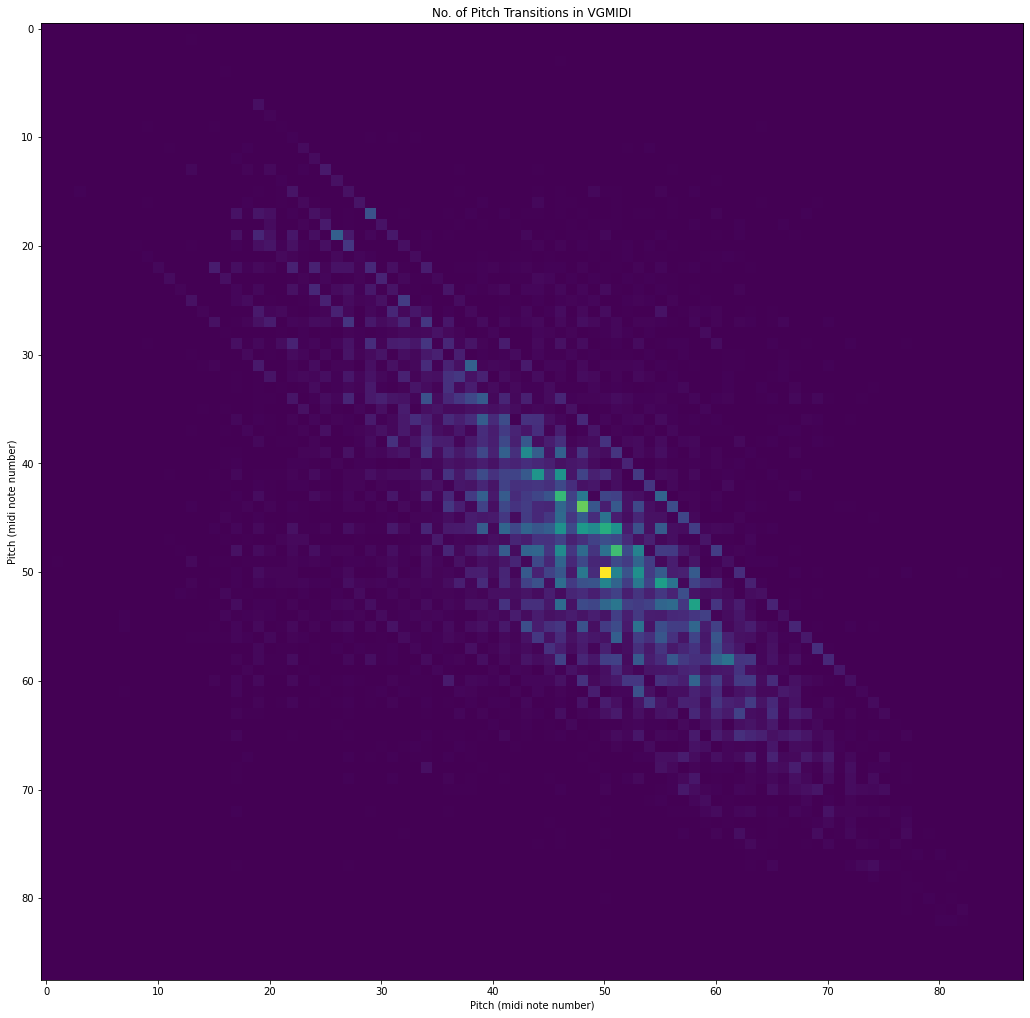

In [ ]:
# what order?
order = 1

# create a markov chain instance
mark1 = Markov()

# then learn a transition table from data
mark1.train(allpitches, order=order)

# plot transition table
mark1.plot_transition_matrix(figscale=0.2)

#mark1.print_transitions()

In [ ]:
# what order?
order = 3

# create a markov chain instance
mark = mai.markov.Markov()

# then learn a transition table from data
mark.train(allpitches, order=order)

# plot transition table
#mark.plot_transition_matrix(figscale=0.2)

In [ ]:
# generate a new melody
new_pitches = mark.choice(k=200-order, suppress_errors=True)

[77, 81, 86, 79, 91, 78, 90, 79, 91, 96, 84, 95, 83, 82, 94, 81, 93, 77, 89, 81, 93, 80, 92, 76, 88, 54, 57, 61, 57, 61, 57, 61, 69, 57, 57, 65, 60, 64, 62, 65, 60, 62, 56, 51, 56, 44, 66, 65, 70, 66, 70, 63, 66, 66, 61, 61, 67, 67, 63, 63, 66, 66, 61, 61, 67, 67, 63, 60, 44, 37, 68, 65, 60, 72, 69, 69, 79, 74, 55, 85, 83, 62, 59, 76, 47, 57, 73, 64, 61, 64, 68, 45, 66, 59, 61, 64, 68, 61, 64, 62, 66, 68, 73, 73, 68, 65, 73, 65, 72, 61, 70, 69, 67, 70, 67, 65, 56, 60, 60, 62, 64, 67, 70, 37, 49, 77, 68, 56, 61, 63, 68, 61, 63, 68, 61, 63, 68, 61, 63, 68, 61, 63, 64, 61, 68, 61, 65, 70, 62, 65, 69, 62, 65, 71, 74, 77, 74, 74, 72, 74, 76, 79, 78, 76, 72, 69, 69, 68, 66, 68, 66, 65, 63, 63, 65, 64, 62, 60, 69, 57, 59, 69, 73, 78, 78, 69, 73, 78, 66, 71, 73, 76, 66, 69, 78, 40, 47, 55, 67, 40]


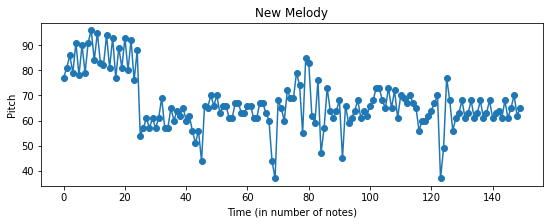

In [ ]:
# print the new music
print(new_pitches)
len(new_pitches)

num_notes=150

plt.figure(figsize=(9,3))
plt.plot(new_pitches[0:num_notes])
plt.scatter(range(num_notes), new_pitches[0:num_notes])
plt.xlabel('Time (in number of notes)')
plt.ylabel('Pitch')
plt.title("New Melody");

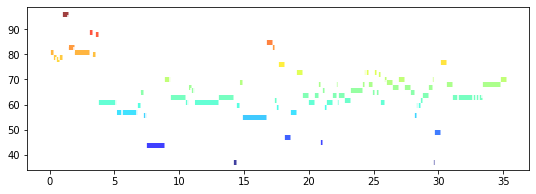

In [ ]:
# plot
mai.make_music_plot(pitches=new_pitches[:num_notes], durs=alldurations[:num_notes])

# play
mai.make_music(pitches=new_pitches[:num_notes], durs=alldurations[:num_notes], pgm=0)

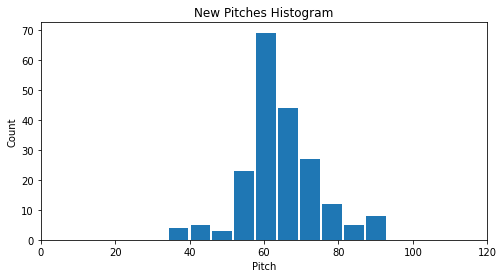

In [ ]:
plt.figure(figsize=(8,4)) 
plt.hist(new_pitches, align='left', rwidth=0.9)
plt.xlim(0,120)
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.title("New Pitches Histogram")
plt.show()

In [ ]:
import pandas as pd

def midi_to_list(midi_data):
    midi_list = []
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            end = note.end
            pitch = note.pitch
            velocity = note.velocity
            midi_list.append([start, end-start, pitch, velocity/128., instrument.name]) #velocity is to control volume of instrument, to make it more human, range from 0-127
    return midi_list
        
keys = list(uploaded.keys())
compiledlist = []

for i in keys[:10]:
  midi_data = pretty_midi.PrettyMIDI(i)
  midi_list = midi_to_list(midi_data)
  compiledlist += midi_list


print(compiledlist)
df = pd.DataFrame(compiledlist, columns=['Start', 'End', 'Pitch', 'Velocity', 'Piano'])
print(df)

# duration = []
# for instrument_index in range(len(midi_data.instruments)):
#   instrument = midi_data.instruments[instrument_index]
#   instrument_dur = [(n2.start - n1.start) for n1,n2 in zip(instrument.notes[:-1], instrument.notes[1:])]
#   duration += instrument_dur
#   duration.append(0)

# df['Duration'] = pd.Series(duration)
# df

/usr/local/lib/python3.6/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


[[0.00450859375, 0.241209765625, 69, 0.265625, 'Piano'], [0.00450859375, 0.241209765625, 81, 0.34375, 'Piano'], [0.24616921875, 0.22858570312499996, 69, 0.25, 'Piano'], [0.24616921875, 0.22858570312499996, 81, 0.328125, 'Piano'], [0.47520578124999996, 0.22723312499999998, 69, 0.2890625, 'Piano'], [0.47520578124999996, 0.22723312499999998, 81, 0.3671875, 'Piano'], [0.7028897656249999, 0.22948742187500004, 69, 0.328125, 'Piano'], [0.7028897656249999, 0.22948742187500004, 81, 0.40625, 'Piano'], [0.932828046875, 0.46129160937500024, 69, 0.5546875, 'Piano'], [0.932828046875, 0.46129160937500024, 81, 0.6640625, 'Piano'], [1.3945811250000004, 0.46940105175781244, 57, 0.5390625, 'Piano'], [1.3945811250000004, 0.46940105175781244, 64, 0.5390625, 'Piano'], [1.3945811250000004, 0.46940105175781244, 69, 0.6484375, 'Piano'], [1.8663175429687504, 1.1510721445312502, 62, 0.6640625, 'Piano'], [1.8663175429687504, 1.1645979257812504, 65, 0.6640625, 'Piano'], [1.8663175429687504, 1.1645979257812504, 74,

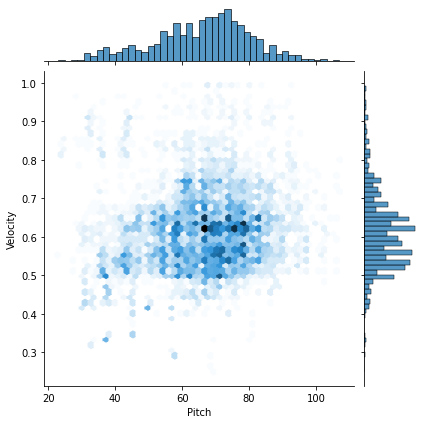

In [ ]:
g = sns.jointplot(x = "Pitch", y = "Velocity", kind = "hex", data = df) 
#g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

In [ ]:
def plot_melodies(original_pitches, new_pitches, num_notes=45):
  """Plot original melody and new melody."""
  plt.figure(figsize=(9,3))
  plt.plot(original_pitches[0:num_notes])
  plt.scatter(range(num_notes), original_pitches[0:num_notes])
  plt.plot(new_pitches[0:num_notes])
  plt.scatter(range(num_notes), new_pitches[0:num_notes])
  plt.ylim([min(original_pitches)-1, max(original_pitches)+1])
  plt.xlabel('Time (in number of notes)')
  plt.ylabel('Pitch')
  plt.title("Original Melody (blue) and New Melody (orange)");

In [ ]:
midi_data = pretty_midi.PrettyMIDI('Age_of_Empires_II_Main_Theme.mid')

altered_midi_data = copy.deepcopy(midi_data)

In [ ]:
# display all instruments
midi_data.instruments

[Instrument(program=0, is_drum=False, name="Piano"),
 Instrument(program=0, is_drum=False, name="Instrument2")]

In [ ]:
# instrument to work with
instrument_index = 0

In [ ]:
# select instrument from list
instrument = midi_data.instruments[instrument_index]
#instrument.notes

# extract pitch to list
original_pitches = [note.pitch for note in instrument.notes] 

# extract durations to list
original_durs = [(n2.start - n1.start) for n1,n2 in zip(instrument.notes[:-1], instrument.notes[1:])]

print(original_pitches)
print(original_durs)

[69, 81, 69, 81, 69, 81, 69, 81, 69, 81, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 64, 67, 76, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 67, 70, 79, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 64, 67, 76, 64, 67, 76, 65, 69, 77, 67, 64, 76, 60, 64, 72, 62, 65, 74, 79, 78, 79, 81, 82, 81, 79, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 78, 79, 79, 74, 74, 74, 77, 81, 82, 81, 79, 75, 74, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 78, 79, 64, 71, 76, 69, 72, 81, 72, 76, 84, 71, 74, 83, 69, 72, 81, 71, 74, 83, 64, 71, 76, 69, 72, 81, 72, 76, 84, 71, 74, 83, 69, 72, 81, 74, 77, 86, 64, 71, 76, 69, 72, 81, 72, 76, 84, 71, 74, 83, 69, 72, 81, 71, 74, 83, 71, 74, 83, 72, 76, 84, 74, 71, 83, 67, 71, 79, 69, 72, 81, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]
[0.0, 0.241660625, 0.0, 0.22903656249999996, 0.0, 0.22768398437499998, 0.0, 0.22993828125000004, 0.0, 0.46175307812500044, 

In [ ]:
print(len(original_pitches))
print(len(original_durs))

219
218


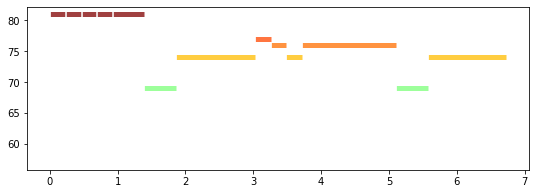

In [ ]:
# num notes
n = 35

# plot
mai.make_music_plot(pitches=original_pitches[:n], durs=original_durs[:n])

# play
mai.make_music(pitches=original_pitches[:n], durs=original_durs[:n], pgm=35) # change the instrument using the the keyword pgm https://en.wikipedia.org/wiki/General_MIDI#Program_change_events

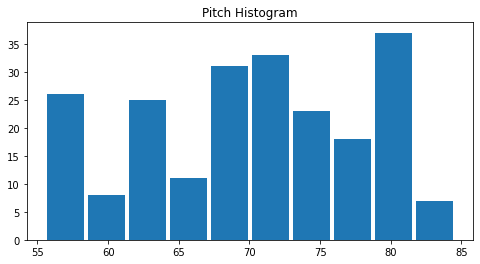

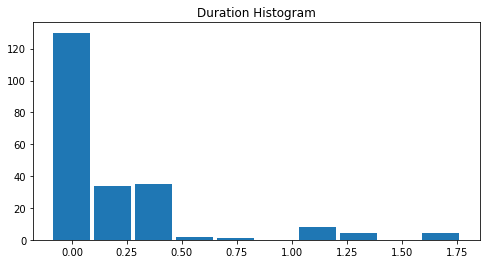

In [ ]:
plt.figure(figsize=(8,4)) 
plt.hist(original_pitches, align='left', rwidth=0.9)
plt.title("Pitch Histogram")
plt.show()

plt.figure(figsize=(8,4)) 
plt.hist(original_durs, align='left', rwidth=0.9)
plt.title("Duration Histogram")
plt.show()

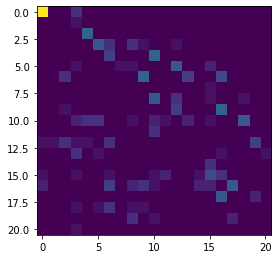

In [ ]:
# what order?
order = 1

# create a markov chain instance
mark = mai.markov.Markov()

# then learn a transition table from data
mark.train(original_pitches, order=order)

# plot transition table
mark.plot_transition_matrix(figscale=0.2)

In [ ]:
# show length of transition table
len(mark.transitions)

77

In [ ]:
# show transition table
mark.print_transitions()

(69,) -> 81 : 5
(81,) -> 69 : 4
(81,) -> 57 : 2
(57,) -> 64 : 3
(64,) -> 69 : 3
(69,) -> 62 : 3
(62,) -> 65 : 7
(65,) -> 74 : 7
(74,) -> 65 : 3
(65,) -> 69 : 4
(69,) -> 77 : 4
(77,) -> 64 : 3
(64,) -> 67 : 6
(67,) -> 76 : 6
(76,) -> 62 : 3
(74,) -> 64 : 2
(76,) -> 57 : 1
(74,) -> 67 : 3
(67,) -> 70 : 1
(70,) -> 79 : 1
(79,) -> 57 : 1
(76,) -> 64 : 1
(76,) -> 65 : 1
(77,) -> 67 : 1
(67,) -> 64 : 1
(64,) -> 76 : 1
(76,) -> 60 : 1
(60,) -> 64 : 1
(64,) -> 72 : 1
(72,) -> 62 : 1
(74,) -> 79 : 1
(79,) -> 78 : 1
(78,) -> 79 : 3
(79,) -> 81 : 3
(81,) -> 82 : 6
(82,) -> 81 : 6
(81,) -> 79 : 2
(79,) -> 75 : 2
(75,) -> 74 : 3
(67,) -> 79 : 2
(79,) -> 79 : 5
(82,) -> 84 : 2
(84,) -> 82 : 2
(81,) -> 78 : 2
(79,) -> 74 : 1
(74,) -> 74 : 2
(74,) -> 77 : 2
(77,) -> 81 : 1
(74,) -> 75 : 1
(79,) -> 64 : 1
(64,) -> 71 : 3
(71,) -> 76 : 3
(76,) -> 69 : 3
(69,) -> 72 : 7
(72,) -> 81 : 7
(81,) -> 72 : 3
(72,) -> 76 : 4
(76,) -> 84 : 4
(84,) -> 71 : 3
(71,) -> 74 : 6
(74,) -> 83 : 6
(83,) -> 69 : 3
(81,) ->

In [ ]:
# generate a new melody
new_pitches = mark.choice(k=len(original_pitches)-order, suppress_errors=True)

# print the new music
print(new_pitches)
len(new_pitches)

[69, 81, 69, 81, 57, 64, 69, 62, 65, 74, 64, 67, 76, 62, 65, 74, 65, 69, 77, 64, 67, 76, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 65, 69, 77, 64, 67, 76, 57, 64, 69, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 65, 69, 77, 64, 67, 76, 62, 65, 74, 65, 69, 77, 67, 64, 76, 60, 64, 72, 62, 65, 74, 64, 67, 76, 64, 67, 76, 62, 65, 74, 64, 67, 76, 62, 65, 74, 64, 67, 76, 62, 65, 74, 79, 78, 79, 81, 82, 84, 82, 81, 82, 81, 79, 75, 74, 67, 79, 79, 79, 81, 82, 81, 79, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 78, 79, 79, 74, 74, 74, 77, 81, 82, 81, 78, 79, 79, 74, 74, 74, 77, 81, 82, 81, 79, 75, 74, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 79, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 79, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 79, 75, 74, 67, 79, 79, 79, 81, 82, 84, 82, 81, 82, 81, 78, 79, 64, 71, 76, 69, 72]


219

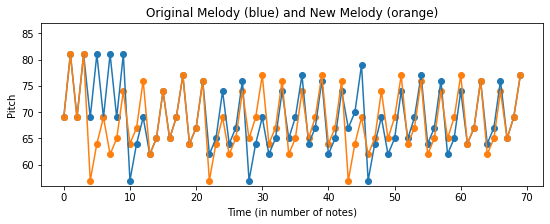

In [ ]:
plot_melodies(original_pitches, new_pitches, num_notes=70)

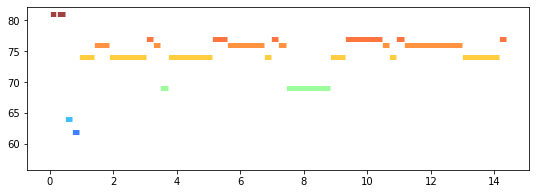

In [ ]:
# num notes
n = 70

# plot
mai.make_music_plot(pitches=new_pitches[:n], durs=original_durs[:n])

# play
mai.make_music(pitches=new_pitches[:n], durs=original_durs[:n], pgm=35)

In [ ]:
plt.figure(figsize=(8,4)) 
plt.hist(new_pitches, align='left', rwidth=0.9)
plt.xlim(35,90)
plt.title("New Pitches Histogram")
plt.xlim(0,120)
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.show()

NameError: ignored

<Figure size 576x288 with 0 Axes>